# Load Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


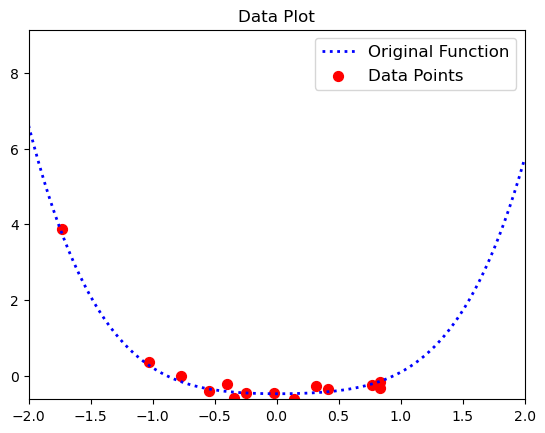

In [2]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [12]:
degree = 4
A = np.zeros((n_data, degree + 1))

# Fill in the elements of the Vandermonde matrix
for i in range(n_data):
    for j in range(degree + 1):
        A[i][j] = x_data[i] ** j

# 'A' is now the Vandermonde matrix

### Print results (do not modify the following block)

In [13]:
print(A)

[[ 1.00000000e+00  7.69458258e-01  5.92066011e-01  4.55570081e-01
   3.50542161e-01]
 [ 1.00000000e+00 -5.48726825e-01  3.01101129e-01 -1.65222266e-01
   9.06618896e-02]
 [ 1.00000000e+00 -3.96088994e-01  1.56886491e-01 -6.21410124e-02
   2.46133711e-02]
 [ 1.00000000e+00 -3.44457358e-01  1.18650871e-01 -4.08701656e-02
   1.40780292e-02]
 [ 1.00000000e+00 -1.73259726e+00  3.00189326e+00 -5.20107204e+00
   9.01136317e+00]
 [ 1.00000000e+00 -1.02635747e+00  1.05340965e+00 -1.08117486e+00
   1.10967189e+00]
 [ 1.00000000e+00  8.31832735e-01  6.91945699e-01  5.75583083e-01
   4.78788850e-01]
 [ 1.00000000e+00  4.18095727e-01  1.74804037e-01  7.30848209e-02
   3.05564513e-02]
 [ 1.00000000e+00 -7.73450895e-01  5.98226287e-01 -4.62698657e-01
   3.57874691e-01]
 [ 1.00000000e+00  1.41388300e-01  1.99906515e-02  2.82644423e-03
   3.99626146e-04]
 [ 1.00000000e+00  3.16614871e-01  1.00244977e-01  3.17390503e-02
   1.00490553e-02]
 [ 1.00000000e+00  8.32089704e-01  6.92373276e-01  5.76116675e-01

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [14]:
# Define the degree of the polynomial
degree = 4

# Initialize the 'w_est' vector as a zero vector
w_est = np.zeros((degree + 1, 1))

# Compute the coefficients of polynomial regression using the formula
w_est = np.linalg.lstsq(A, y_data, rcond=None)[0]

# Initialize the 'y_est' list as a zero list
y_est = np.zeros_like(x_list)

# Compute the estimated function values
for i in range(len(x_list)):
    y_est[i] = np.sum(w_est * (x_list[i] ** np.arange(degree + 1)))

# 'w_est' now contains the coefficients of the polynomial regression
# 'y_est' contains the estimated function values corresponding to 'x_list'

# You can print 'w_est' and 'y_est' if needed
print("Coefficients of the polynomial regression:")
print(w_est)
print("Estimated function values:")
print(y_est)


Coefficients of the polynomial regression:
[-0.44892915  0.04218512  0.29573867 -0.22965006  0.26044299]
Estimated function values:
[ 6.65394358e+00  6.17255641e+00  5.71613603e+00  5.28379198e+00
  4.87465043e+00  4.48785424e+00  4.12256291e+00  3.77795260e+00
  3.45321614e+00  3.14756299e+00  2.86021931e+00  2.59042788e+00
  2.33744816e+00  2.10055626e+00  1.87904494e+00  1.67222363e+00
  1.47941842e+00  1.29997206e+00  1.13324393e+00  9.78610097e-01
  8.35463283e-01  7.03212860e-01  5.81284860e-01  4.69121975e-01
  3.66183552e-01  2.71945599e-01  1.85900780e-01  1.07558418e-01
  3.64444947e-02 -2.78983522e-02 -8.59108254e-02 -1.38016970e-01
 -1.84624174e-01 -2.26123166e-01 -2.62888016e-01 -2.95276139e-01
 -3.23628289e-01 -3.48268564e-01 -3.69504403e-01 -3.87626586e-01
 -4.02909237e-01 -4.15609821e-01 -4.25969145e-01 -4.34211358e-01
 -4.40543951e-01 -4.45157757e-01 -4.48226952e-01 -4.49909051e-01
 -4.50344916e-01 -4.49658745e-01 -4.47958083e-01 -4.45333814e-01
 -4.41860165e-01 -4.375

### Print results (do not modify the following block)

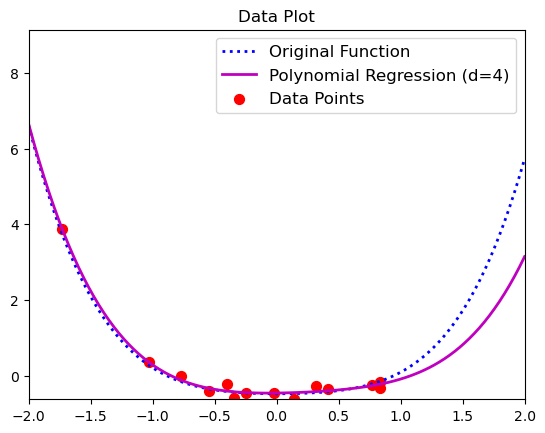

In [15]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [16]:
# Set the degree to 1
degree1 = 1

# Initialize the Vandermonde matrix 'A1' for degree 1 as a zero matrix
A1 = np.zeros((n_data, degree1 + 1))

# Fill in the elements of the Vandermonde matrix for degree 1
for i in range(n_data):
    for j in range(degree1 + 1):
        A1[i][j] = x_data[i] ** j

# Initialize 'w_est1' as a zero vector for degree 1
w_est1 = np.zeros((degree1 + 1, 1))

# Compute the coefficients of polynomial regression for degree 1
w_est1 = np.linalg.lstsq(A1, y_data, rcond=None)[0]

# Initialize 'y_est1' as a zero list for degree 1
y_est1 = np.zeros_like(x_list)

# Compute the estimated function values for degree 1
for i in range(len(x_list)):
    y_est1[i] = np.sum(w_est1 * (x_list[i] ** np.arange(degree1 + 1)))

# 'w_est1' contains the coefficients of the polynomial regression for degree 1
# 'y_est1' contains the estimated function values for degree 1

### Print results (do not modify the following block)

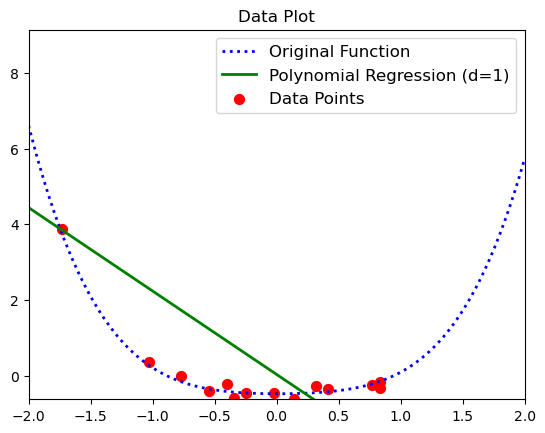

In [17]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [18]:
# Set the degree to 10
degree2 = 10

# Initialize the Vandermonde matrix 'A2' for degree 10 as a zero matrix
A2 = np.zeros((n_data, degree2 + 1))

# Fill in the elements of the Vandermonde matrix for degree 10
for i in range(n_data):
    for j in range(degree2 + 1):
        A2[i][j] = x_data[i] ** j

# Initialize 'w_est2' as a zero vector for degree 10
w_est2 = np.zeros((degree2 + 1, 1))

# Compute the coefficients of polynomial regression for degree 10
w_est2 = np.linalg.lstsq(A2, y_data, rcond=None)[0]

# Initialize 'y_est2' as a zero list for degree 10
y_est2 = np.zeros_like(x_list)

# Compute the estimated function values for degree 10
for i in range(len(x_list)):
    y_est2[i] = np.sum(w_est2 * (x_list[i] ** np.arange(degree2 + 1)))

# 'w_est2' contains the coefficients of the 10-degree polynomial regression
# 'y_est2' contains the estimated function values for this regression

### Print results (do not modify the following block)

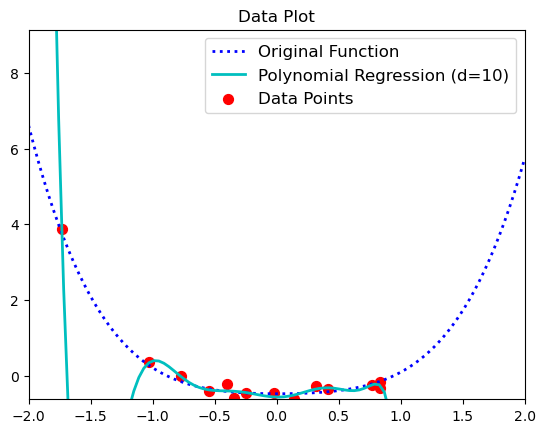

In [19]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

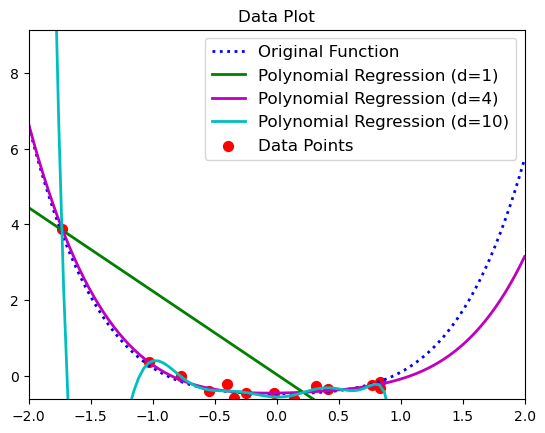

In [22]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!

In [21]:
Certainly, let's discuss the effects of different polynomial degrees (1, 4, 10) in polynomial regression and the associated pros and cons. This phenomenon is often referred to as the "Bias-Variance Tradeoff" in machine learning.

**Low-Degree Polynomial (Degree 1):**

Pros:
1. **Simplicity**: Low-degree polynomials are simple and easy to interpret. They are often useful when the relationship between variables is approximately linear.
2. **Stability**: They have lower variance and are less sensitive to small fluctuations or noise in the data.
3. **Generalization**: Low-degree polynomials tend to generalize well to unseen data, making them suitable for scenarios with limited data.

Cons:
1. **Underfitting**: Low-degree polynomials may fail to capture complex patterns in the data, leading to underfitting. They are not expressive enough to model nonlinear relationships.

**High-Degree Polynomial (Degree 10):**

Pros:
1. **Flexibility**: High-degree polynomials are very flexible and can model intricate, nonlinear relationships in the data.
2. **Overfitting**: They can closely fit the training data, potentially achieving low training error.

Cons:
1. **Complexity**: High-degree polynomials are complex models that can be challenging to interpret, and they may lead to overfitting.
2. **High Variance**: They have high variance, meaning they are sensitive to noise in the data and may not generalize well to new, unseen data.

The "Bias-Variance Tradeoff" refers to the balance that needs to be struck when choosing a model's complexity. In summary:

- **Bias**: Low-degree polynomials have high bias because they make strong assumptions about the data's structure, often leading to underfitting. They are biased toward a simple model.

- **Variance**: High-degree polynomials have high variance because they are very flexible and can fit the training data closely, including noise. This can result in overfitting. They have high variance because they are sensitive to small changes in the data.

The choice of the polynomial degree in polynomial regression is crucial. You want a degree that is complex enough to capture the underlying data patterns but not so complex that it overfits. The ideal degree depends on the specific dataset and the trade-off between bias and variance. Regularization techniques, such as ridge regression or Lasso regression, can also be used to control the trade-off between bias and variance in polynomial regression.

SyntaxError: EOL while scanning string literal (698318433.py, line 1)